## Inicio

In [1]:
# import
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import tensorflow
import plotly

In [ ]:

# python==3.12.10
# matplotlib==3.7.5
# tensorflow==2.18.0
# plotly==5.24.1
# pandas==2.2.2
# numpy==1.26.4
# scikit-learn==1.4.2

print(f'matplotlib=={matplotlib.__version__}')
print(f'tensorflow=={tensorflow.__version__}')
print(f'plotly=={plotly.__version__}')
print(f'pd=={pd.__version__}')
print(f'np=={np.__version__}')
print(f'sklearn=={sklearn.__version__}')

matplotlib==3.7.5
tensorflow==2.18.0
plotly==5.24.1
pd==2.2.2
np==1.26.4
sklearn==1.4.2


## Tratamento das bases

Nos tratamentos da `base_cadastral` e `base_info` eu adotei o racional de substituir os valores nulos, devido ao fato de que irei ultilizar os valos das duas bases para enriquecer a `base_pagamentos`. <br>
Excluir informações nessa etapa iria prejudicar tratamentos futuros.

### Tratando `base_cadastral`

#### Resumo do tratamento
Nos blocos a seguir, realizei as seguintes tarefas:
- Tratamento dos valores NaN na colunas `FLAG_PF`, transformandos os valores em 1 ou 0
- Subistitui os valores nulos nas colunas `PORTE`,`SEGMENTO_INDUSTRIAL`,`DOMINIO_EMAIL` pela `MODA` (valores mais frequentes)

##### Leitura

In [ ]:
base_cadastral = pd.read_csv('data/base_cadastral.csv', sep= ';')
print(base_cadastral.info())
print(base_cadastral.isnull().sum())
display(base_cadastral.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB
None
ID_CLIENTE                0
DATA_CADASTRO             0
DDD                     237
FLAG_PF                1249
SEGMENTO_INDUSTRIAL      83
DOMINIO_EMAIL            30
PORTE                    41
CEP_2_DIG                 0
dtype: int64


,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77


##### Ajustando valores `Null` da coluna `FLAG_PF`, transformando em 1 ou 0

In [4]:
# Temos 1249
base_cadastral['FLAG_PF'].value_counts()

FLAG_PF
X    66
Name: count, dtype: int64

In [5]:
# tranformando os valores X e NaN em 1 ou 0 
base_cadastral['FLAG_PF']=(base_cadastral['FLAG_PF']== "X").astype(int)
base_cadastral['FLAG_PF'].value_counts()

FLAG_PF
0    1249
1      66
Name: count, dtype: int64

##### Ajustando valores `Null` da coluna `PORTE`, transformando em valores que mais aparecem

In [6]:
# temos 41 valores NaN
print(base_cadastral['PORTE'].value_counts())

PORTE
MEDIO      522
GRANDE     480
PEQUENO    272
Name: count, dtype: int64


In [7]:
base_cadastral.loc[base_cadastral['PORTE'].isna()].head(2)

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
21,5301988619224057921,2016-02-24,67,0,Indústria,GMAIL,NaN,79
51,8729164666041467296,2014-03-13,71,0,Serviços,GMAIL,NaN,41


In [8]:
base_cadastral.loc[base_cadastral['PORTE'].isna(), 'PORTE'] = 'MEDIO'
print(base_cadastral['PORTE'].value_counts())

PORTE
MEDIO      563
GRANDE     480
PEQUENO    272
Name: count, dtype: int64


##### Ajustando valores `Null` da coluna `SEGMENTO_INDUSTRIAL`, transformando em valores que mais aparecem

In [9]:
# Temos 83 NULL
base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts()

SEGMENTO_INDUSTRIAL
Serviços     503
Comércio     431
Indústria    298
Name: count, dtype: int64

In [10]:
base_cadastral.loc[base_cadastral['SEGMENTO_INDUSTRIAL'].isna()].head(2)

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
11,3118152790263512426,2000-08-15,21,0,NaN,OUTLOOK,MEDIO,22
19,314309872114206760,2011-02-14,41,0,NaN,YAHOO,GRANDE,82


In [11]:
base_cadastral.loc[base_cadastral['SEGMENTO_INDUSTRIAL'].isna(), 'SEGMENTO_INDUSTRIAL'] = 'Serviços'
print(base_cadastral['SEGMENTO_INDUSTRIAL'].value_counts())

SEGMENTO_INDUSTRIAL
Serviços     586
Comércio     431
Indústria    298
Name: count, dtype: int64


##### Ajustando valores `Null` da coluna `DOMINIO_EMAIL`, transformando em valores que mais aparecem

In [12]:
# Temos 83 NULL
print(base_cadastral['DOMINIO_EMAIL'].value_counts())

DOMINIO_EMAIL
YAHOO      392
GMAIL      390
HOTMAIL    323
AOL         74
OUTLOOK     72
BOL         34
Name: count, dtype: int64


In [13]:

base_cadastral.loc[base_cadastral['DOMINIO_EMAIL'].isna(),'DOMINIO_EMAIL'] = "YAHOO"
print(base_cadastral['DOMINIO_EMAIL'].value_counts())

DOMINIO_EMAIL
YAHOO      422
GMAIL      390
HOTMAIL    323
AOL         74
OUTLOOK     72
BOL         34
Name: count, dtype: int64


### Tratando `base_info`

#### Resumo do tratamento
Nos blocos a seguir, realizei as seguintes tarefas:
- Merge para enriquecer o dataframe `base_info` com as informações de `PORTE` da`base_cadastral`.
- Na coluna `PORTE` havia empresas que não estavam na `base_cadastral`, eu sobstituir os valores faltantes pela `MODA`.
- As colunas `NO_FUNCIONARIOS`, `RENDA_MES_ANTERIOR_media` e `NO_FUNCIONARIOS_media` substitui pela `MÉDIA` de cada `PORTE`

##### Leitura

In [ ]:
base_info = pd.read_csv('data/base_info.csv', sep=';')
print(base_info.info())
print(base_info.isnull().sum())
display(base_info.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  23684 non-null  float64
 3   NO_FUNCIONARIOS     23149 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB
None
ID_CLIENTE               0
SAFRA_REF                0
RENDA_MES_ANTERIOR     717
NO_FUNCIONARIOS       1252
dtype: int64


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0


##### Merge para ajudar a substituir valores nulos

In [15]:
base_info_merged = base_info.merge(base_cadastral[['PORTE', 'ID_CLIENTE']], how ='left', on = 'ID_CLIENTE')
display(base_info_merged.isnull().sum())
display(base_info_merged.head(2))

ID_CLIENTE               0
SAFRA_REF                0
RENDA_MES_ANTERIOR     717
NO_FUNCIONARIOS       1252
PORTE                   30
dtype: int64

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PORTE
0,1661240395903230676,2018-09,16913.0,NaN,PEQUENO
1,8274986328479596038,2018-09,106430.0,141.0,MEDIO


Empresas sem informação de `NO_FUNCIONARIOS`, `PORTE`, `RENDA_MES_ANTERIOR_media`, `NO_FUNCIONARIOS_media` não estão na `base_cadastral`

In [16]:
# confirmando se os clientes sem info de porte não estão na base cadastral
base_cadastral.loc[base_cadastral.ID_CLIENTE.isin(base_info_merged.loc[base_info_merged.PORTE.isnull(), 'ID_CLIENTE'])]

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG


##### Criando um DataFrame com as médias para substituir os valores nulos.
- Na coluna `PORTE` vou substituir pela `MODA`.
- As colunas `NO_FUNCIONARIOS`, `RENDA_MES_ANTERIOR_media` e `NO_FUNCIONARIOS_media` substituirei pela `MÉDIA` de cada `PORTE`
- Transformação de variaveis numericas em categoricas.


In [17]:
# Agrupando por ID_CLIENTE e calcula a média das colunas RENDA_MES_ANTERIOR e NO_FUNCIONARIOS de cada cliente
medias_por_cliente = base_info_merged.groupby(['ID_CLIENTE','PORTE']).agg({
    'RENDA_MES_ANTERIOR': 'mean',
    'NO_FUNCIONARIOS': 'mean'
}).reset_index().sort_values('ID_CLIENTE')

In [18]:
colunas = ['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']

# preenchendo nulos com a média do grupo PORTE
for coluna in colunas:
    medias = medias_por_cliente.groupby('PORTE')[coluna].transform('mean')
    medias_por_cliente[coluna] = medias_por_cliente[coluna].fillna(medias)
print(medias_por_cliente.isnull().sum())

ID_CLIENTE            0
PORTE                 0
RENDA_MES_ANTERIOR    0
NO_FUNCIONARIOS       0
dtype: int64


In [19]:
merged_base_info = base_info.merge(
    medias_por_cliente,
    how='left',
    on=['ID_CLIENTE'],
    suffixes=('', '_media')
)

merged_base_info['RENDA_MES_ANTERIOR_media'] = merged_base_info['RENDA_MES_ANTERIOR_media'].fillna(merged_base_info['RENDA_MES_ANTERIOR_media'].mean())

merged_base_info['NO_FUNCIONARIOS_media'] = merged_base_info['NO_FUNCIONARIOS_media'].fillna(merged_base_info['NO_FUNCIONARIOS_media'].mean())

print(merged_base_info.shape)
print(merged_base_info.isnull().sum())
merged_base_info.head(2)

(24401, 7)
ID_CLIENTE                     0
SAFRA_REF                      0
RENDA_MES_ANTERIOR           717
NO_FUNCIONARIOS             1252
PORTE                         30
RENDA_MES_ANTERIOR_media       0
NO_FUNCIONARIOS_media          0
dtype: int64


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,PORTE,RENDA_MES_ANTERIOR_media,NO_FUNCIONARIOS_media
0,1661240395903230676,2018-09,16913.0,NaN,PEQUENO,290074.138889,99.727273
1,8274986328479596038,2018-09,106430.0,141.0,MEDIO,172686.545455,144.636364


In [20]:
merged_base_info['PORTE'] = merged_base_info['PORTE'].fillna(merged_base_info['PORTE'].mode()[0])
for coluna in ['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']:
    merged_base_info[coluna] = merged_base_info[coluna].fillna(merged_base_info[f'{coluna}_media'])
print(merged_base_info.shape)
print(merged_base_info.isnull().sum())

(24401, 7)
ID_CLIENTE                  0
SAFRA_REF                   0
RENDA_MES_ANTERIOR          0
NO_FUNCIONARIOS             0
PORTE                       0
RENDA_MES_ANTERIOR_media    0
NO_FUNCIONARIOS_media       0
dtype: int64


In [21]:
# Atribuindo todos os tratamentos para base_info.
base_info = merged_base_info.copy()

## Montando `base_pagamentos_desenvolvimento`

##### Leitura

In [ ]:
base_pagamentos_desenvolvimento = pd.read_csv('data/base_pagamentos_desenvolvimento.csv', sep=';')
print(base_pagamentos_desenvolvimento.info())
print(base_pagamentos_desenvolvimento.isnull().sum())
display(base_pagamentos_desenvolvimento.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           76244 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB
None
ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99


##### Tratando as colunas para o formata correto de data para gerar cálculos como o indicador de atraso

In [23]:
base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO'], errors='coerce')

base_pagamentos_desenvolvimento['DATA_PAGAMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_PAGAMENTO'], errors='coerce')

base_pagamentos_desenvolvimento['DATA_VENCIMENTO'] = pd.to_datetime(
    base_pagamentos_desenvolvimento['DATA_VENCIMENTO'], errors='coerce')

In [24]:
base_pagamentos_desenvolvimento['ATRASADO'] = ((base_pagamentos_desenvolvimento['DATA_PAGAMENTO'] - base_pagamentos_desenvolvimento['DATA_VENCIMENTO'] ).dt.days >= 5).astype(int)
base_pagamentos_desenvolvimento['PRAZO'] = (base_pagamentos_desenvolvimento['DATA_VENCIMENTO'] - base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO']).dt.days
display(base_pagamentos_desenvolvimento.head(5))
print(base_pagamentos_desenvolvimento['ATRASADO'].value_counts())


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,0,20
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,0,22
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,0,22
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,1,36
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,0,20


ATRASADO
0    71978
1     5436
Name: count, dtype: int64


In [25]:
base_pagamentos_desenvolvimento.describe()

,ID_CLIENTE,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO
count,7.741400e+04,77414,77414,77414,7.624400e+04,77414.000000,77414.000000,77414.000000
mean,4.662270e+18,2020-02-02 21:01:42.400082688,2020-02-26 00:36:28.627380224,2020-02-26 04:43:20.087839232,4.659078e+04,6.789623,0.070220,23.320575
min,8.784237e+15,2018-08-17 00:00:00,2018-06-19 00:00:00,2017-11-27 00:00:00,1.000000e-01,4.990000,0.000000,-420.000000
25%,2.369365e+18,2019-05-21 00:00:00,2019-06-13 00:00:00,2019-06-13 00:00:00,1.876536e+04,5.990000,0.000000,16.000000
50%,4.817817e+18,2020-01-27 00:00:00,2020-02-19 00:00:00,2020-02-18 00:00:00,3.475869e+04,5.990000,0.000000,18.000000
75%,6.969349e+18,2020-10-27 00:00:00,2020-11-18 00:00:00,2020-11-18 00:00:00,6.093384e+04,6.990000,0.000000,24.000000
max,9.206031e+18,2021-06-30 00:00:00,2021-11-24 00:00:00,2027-03-31 00:00:00,4.400000e+06,11.990000,1.000000,2677.000000
std,2.665719e+18,NaN,NaN,NaN,4.643393e+04,1.798225,0.255519,26.137018


In [26]:
# Data de emissão posterior a data de vencimento
# acredito que seja alguma regra de negócio, erro ou pegadinha.
base_pagamentos_desenvolvimento.loc[base_pagamentos_desenvolvimento['PRAZO']<0]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO
1099,1118514612547157551,2018-09,2018-09-02,2018-09-19,2018-08-27,58434.08,6.99,1,-6
1100,1118514612547157551,2018-09,2018-09-02,2018-09-18,2018-06-20,50000.00,6.99,1,-74
1101,1118514612547157551,2018-09,2018-09-02,2018-09-19,2018-07-25,58434.08,6.99,1,-39
1944,1977574645216036803,2018-09,2018-09-13,2018-09-28,2018-08-31,46674.40,5.99,1,-13
2565,8198518259946944874,2018-10,2018-10-12,2019-05-22,2017-11-27,11878.82,4.99,1,-319
5009,6020593949794792044,2018-11,2018-11-06,2021-03-23,2018-11-05,278657.56,6.99,1,-1
5481,8198518259946944874,2018-11,2018-11-13,2018-06-19,2017-12-28,255.43,6.99,1,-320
8379,8348574220426911086,2019-01,2019-01-03,2019-01-16,2018-12-17,10000.00,6.99,1,-17
16200,4442205629227031623,2019-03,2019-03-24,2019-06-12,2018-12-07,100000.00,5.99,1,-107
16201,4442205629227031623,2019-03,2019-03-24,2019-06-14,2018-12-07,63000.00,5.99,1,-107


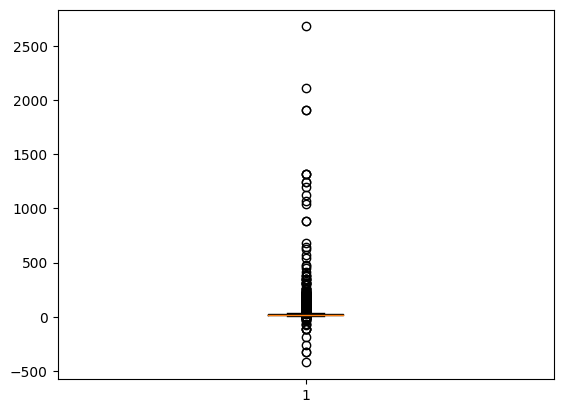

In [27]:
import matplotlib.pyplot as plt
plt.boxplot(base_pagamentos_desenvolvimento['PRAZO'])

plt.show()

In [28]:
base_pagamentos_desenvolvimento['EMISSAO_X_PAGAMENTO'] = (base_pagamentos_desenvolvimento['DATA_EMISSAO_DOCUMENTO'] - base_pagamentos_desenvolvimento['DATA_PAGAMENTO']).dt.days
# data de pagamento anterior a data de emissão
# acredito que seja alguma regra de negócio, erro ou pegadinha.
base_pagamentos_desenvolvimento.loc[base_pagamentos_desenvolvimento['EMISSAO_X_PAGAMENTO']>0]

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO,EMISSAO_X_PAGAMENTO
5481,8198518259946944874,2018-11,2018-11-13,2018-06-19,2017-12-28,255.43,6.99,1,-320,147
10305,8733525963966339207,2019-01,2019-01-04,2018-12-27,2019-01-21,15143.60,6.99,0,17,8
15756,2209806355660046187,2019-03,2019-03-24,2019-02-26,2019-04-09,1356.70,11.99,0,16,26
17888,6056959220685085102,2019-04,2019-04-18,2019-04-12,2019-05-15,1182.00,5.99,0,27,6
18188,660382477567765256,2019-05,2019-05-13,2019-04-23,2019-01-23,600000.00,4.99,1,-110,20
25889,8047821974672655407,2019-08,2019-08-12,2019-06-11,2019-06-06,500000.00,6.99,1,-67,62
32778,8609938720215175911,2019-10,2019-10-29,2019-09-30,2019-11-18,34298.55,5.99,0,20,29
37827,6693181132429641622,2020-01,2020-01-05,2019-12-26,2019-12-26,88000.00,4.99,0,-10,10
38057,1292049196559782171,2020-01,2020-01-17,2020-01-07,2020-02-01,327.60,5.99,0,15,10
38065,1292049196559782171,2020-02,2020-02-11,2020-01-09,2020-02-26,599.13,5.99,0,15,33


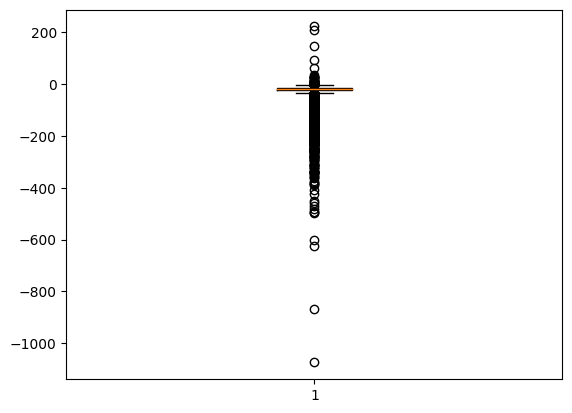

In [29]:
plt.boxplot(base_pagamentos_desenvolvimento['EMISSAO_X_PAGAMENTO'])

plt.show()

In [30]:
# aplicando a correção dos prazos negativos
base_pagamentos_desenvolvimento.loc[base_pagamentos_desenvolvimento['PRAZO']<0, 'PRAZO'] = base_pagamentos_desenvolvimento.loc[base_pagamentos_desenvolvimento['PRAZO']>0, 'PRAZO'].mode()[0]

##### Criando o indicador se o cliente já atrasou alguma vez

In [31]:
historico_atraso = base_pagamentos_desenvolvimento.groupby('ID_CLIENTE').agg({
    'ATRASADO': 'max'})

In [32]:

base_pagamentos_desenvolvimento['HISTORICO_ATRASO'] = base_pagamentos_desenvolvimento['ID_CLIENTE'].map(historico_atraso['ATRASADO'])

##### Merge com o dataframe `base_cadastral` para enriquecer a `base_pagamentos`

In [33]:
merged_base_pagamentos_desenvolvimento = base_pagamentos_desenvolvimento.merge(base_cadastral[['ID_CLIENTE','SEGMENTO_INDUSTRIAL','DOMINIO_EMAIL','PORTE','FLAG_PF']],
                                                           how='left', on='ID_CLIENTE')
print(merged_base_pagamentos_desenvolvimento.shape)
print(merged_base_pagamentos_desenvolvimento.isnull().sum())
merged_base_pagamentos_desenvolvimento.head(2)

(77414, 15)
ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
ATRASADO                     0
PRAZO                        0
EMISSAO_X_PAGAMENTO          0
HISTORICO_ATRASO             0
SEGMENTO_INDUSTRIAL          0
DOMINIO_EMAIL                0
PORTE                        0
FLAG_PF                      0
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO,EMISSAO_X_PAGAMENTO,HISTORICO_ATRASO,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,FLAG_PF
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,0,20,-20,1,Serviços,YAHOO,PEQUENO,0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,0,22,-23,1,Serviços,YAHOO,PEQUENO,0


##### Merge com o dataframe `base_info` para enriquecer a `base_pagamentos`

In [34]:
base_pagamentos_desenvolvimento_full = merged_base_pagamentos_desenvolvimento.merge(
    base_info[['ID_CLIENTE','SAFRA_REF','NO_FUNCIONARIOS','RENDA_MES_ANTERIOR']],
    how='left',
    on=['ID_CLIENTE','SAFRA_REF']
)

colunas = ['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']

# preenchendo nulos com a média do grupo PORTE
for coluna in colunas:
    medias = base_pagamentos_desenvolvimento_full.groupby('PORTE')[coluna].transform('mean')
    base_pagamentos_desenvolvimento_full[coluna] = base_pagamentos_desenvolvimento_full[coluna].fillna(medias)


print(base_pagamentos_desenvolvimento_full.shape)
print(base_pagamentos_desenvolvimento_full.isnull().sum())
base_pagamentos_desenvolvimento_full.head(2)

(77414, 17)
ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
ATRASADO                     0
PRAZO                        0
EMISSAO_X_PAGAMENTO          0
HISTORICO_ATRASO             0
SEGMENTO_INDUSTRIAL          0
DOMINIO_EMAIL                0
PORTE                        0
FLAG_PF                      0
NO_FUNCIONARIOS              0
RENDA_MES_ANTERIOR           0
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,ATRASADO,PRAZO,EMISSAO_X_PAGAMENTO,HISTORICO_ATRASO,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,FLAG_PF,NO_FUNCIONARIOS,RENDA_MES_ANTERIOR
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,0,20,-20,1,Serviços,YAHOO,PEQUENO,0,113.078586,285268.89731
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,0,22,-23,1,Serviços,YAHOO,PEQUENO,0,113.078586,285268.89731


##### Substituindo os valores nulos da coluna `VALOR_A_PAGAR` pela média de cada porte 

In [35]:
base_pagamentos_desenvolvimento_full.loc[(base_pagamentos_desenvolvimento_full['VALOR_A_PAGAR'].isna()) & (base_pagamentos_desenvolvimento_full['PORTE'] == 'GRANDE'), 'VALOR_A_PAGAR'] = base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE'] == 'GRANDE', 'VALOR_A_PAGAR'].mean()
base_pagamentos_desenvolvimento_full.loc[(base_pagamentos_desenvolvimento_full['VALOR_A_PAGAR'].isna()) & (base_pagamentos_desenvolvimento_full['PORTE'] == 'MEDIO'), 'VALOR_A_PAGAR'] = base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE'] == 'MEDIO', 'VALOR_A_PAGAR'].mean()
base_pagamentos_desenvolvimento_full.loc[(base_pagamentos_desenvolvimento_full['VALOR_A_PAGAR'].isna()) & (base_pagamentos_desenvolvimento_full['PORTE'] == 'PEQUENO'), 'VALOR_A_PAGAR'] = base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE'] == 'PEQUENO', 'VALOR_A_PAGAR'].mean()

print(base_pagamentos_desenvolvimento_full.shape)
print(base_pagamentos_desenvolvimento_full.isnull().sum())

(77414, 17)
ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
ATRASADO                  0
PRAZO                     0
EMISSAO_X_PAGAMENTO       0
HISTORICO_ATRASO          0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
FLAG_PF                   0
NO_FUNCIONARIOS           0
RENDA_MES_ANTERIOR        0
dtype: int64


##### Tranformandos as variaveis categoricas em numericas

Na coluna `PORTE` coloquei em sequencia, pois acredito que quanto maior o porte da empresa melhor.<br>
Nas colunas `SEGMENTO_INDUSTRIAL` e `DOMINIO_EMAIL` apliquei o one-hot encoded de simples com o próprio pandas.

In [36]:
base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE']=='PEQUENO','PORTE'] = 0
base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE']=='MEDIO','PORTE'] = 1
base_pagamentos_desenvolvimento_full.loc[base_pagamentos_desenvolvimento_full['PORTE']=='GRANDE','PORTE'] = 2
base_pagamentos_desenvolvimento_full[['Comércio','Indústria','Serviços']] = pd.get_dummies(base_pagamentos_desenvolvimento_full['SEGMENTO_INDUSTRIAL']).astype(int)
base_pagamentos_desenvolvimento_full[['AOL','BOL','GMAIL','HOTMAIL','OUTLOOK','YAHOO']] = pd.get_dummies(base_pagamentos_desenvolvimento_full['DOMINIO_EMAIL']).astype(int)

## Preparação da base, criação e teste de modelos

##### Equilibrando os dados

In [37]:
colunas = ['PORTE','Comércio','Indústria','Serviços','AOL','BOL','GMAIL','HOTMAIL','OUTLOOK','YAHOO','RENDA_MES_ANTERIOR','NO_FUNCIONARIOS','TAXA','VALOR_A_PAGAR','PRAZO','FLAG_PF','HISTORICO_ATRASO','ATRASADO']

import plotly.express as px
# Gerando uma matriz de correlação para visualizar as relações entre os indicadores.

corr = base_pagamentos_desenvolvimento_full[colunas].corr()

fig = px.imshow(
    corr.round(2),
    text_auto=True,  
    aspect='auto', 
    
    color_continuous_scale='RdBu_r',
    width=1200, height=500
    )

fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),
                  title=dict(text='Correlação entre os indicadores', y=0.95, x=0.5, xanchor='center', yanchor='top')
                  )
fig.show()

In [38]:
print(base_pagamentos_desenvolvimento_full.ATRASADO.value_counts())

ATRASADO
0    71978
1     5436
Name: count, dtype: int64


In [39]:
com_atraso = base_pagamentos_desenvolvimento_full[colunas].loc[base_pagamentos_desenvolvimento_full.ATRASADO == 1]
sem_atrado = base_pagamentos_desenvolvimento_full[base_pagamentos_desenvolvimento_full['ATRASADO'] == 0][colunas].sample(n=com_atraso.shape[0], random_state=42)
equilibrados = pd.concat([com_atraso, sem_atrado], ignore_index=True)

In [40]:
# separando variaveis dependentes das independentes
independente = equilibrados.ATRASADO.values
dependentes = equilibrados[colunas].drop(columns='ATRASADO').values

print(equilibrados.ATRASADO.value_counts())

ATRASADO
1    5436
0    5436
Name: count, dtype: int64


In [41]:

# Gerando uma matriz de correlação para visualizar as relações entre os indicadores.
corr = equilibrados[colunas].corr()

fig = px.imshow(
    corr.round(2),
    text_auto=True,  
    aspect='auto', 
    
    color_continuous_scale='RdBu_r', 
    width=1200, height=500
    )

fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),
                  title=dict(text='Correlação entre os indicadores', y=0.95, x=0.5, xanchor='center', yanchor='top')
                  )
fig.show()

##### Dividindo os dados entre treino e teste, e aplicando padronização

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dependentes,independente, test_size=0.4, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Testando com modelo de Regressão Logística simples

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      2134
           1       0.70      0.86      0.77      2215

    accuracy                           0.74      4349
   macro avg       0.76      0.74      0.74      4349
weighted avg       0.76      0.74      0.74      4349

Matriz de Confusão:
[[1325  809]
 [ 309 1906]]
AUC-ROC: 0.8242339971354888


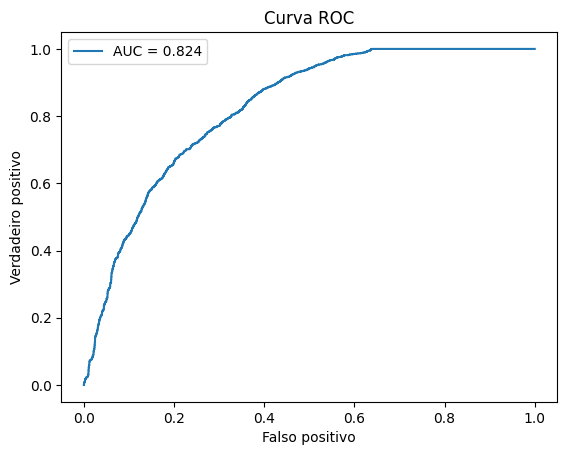

In [43]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Treinando a regressão logística
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

lr_model.fit(x_train, y_train)

# Fazendo previsões
probs = lr_model.predict_proba(x_test)[:, 1]  # Probabilidades da classe 1



y_pred = (probs >= 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()
# Com os dados desbalanceados foram 0.02 de acerto no nosso target
# Matriz de Confusão:
# [[28790    37]
#  [ 2102    37]]

# Com class_weight='balanced' foram 0.24 de acerto no nosso target
# Matriz de Confusão:
# [[17625 11202]
#  [  302  1837]]

##### Testando com modelo de Floresta aleatória simples

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2134
           1       0.86      0.87      0.87      2215

    accuracy                           0.86      4349
   macro avg       0.86      0.86      0.86      4349
weighted avg       0.86      0.86      0.86      4349

Matriz de Confusão:
[[1824  310]
 [ 278 1937]]
AUC-ROC: 0.9336694303346231


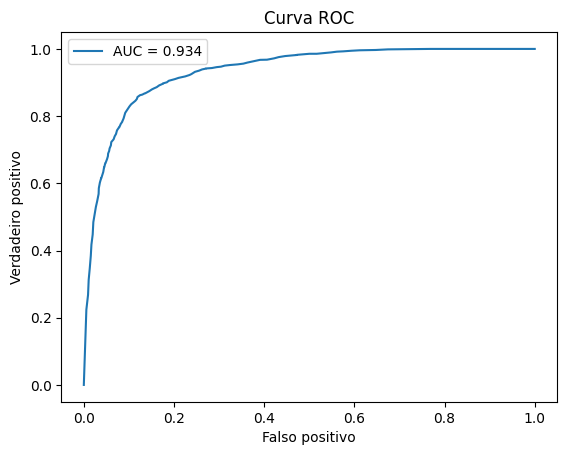

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Cria o modelo com parâmetros padrão
modelo_rf = RandomForestClassifier()


modelo_rf.fit(x_train, y_train)

probs = modelo_rf.predict_proba(x_test)[:, 1]  # Probabilidades da classe 1

y_pred = (probs >= 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()
# Com class_weight='balanced' foram 0.60 de acerto no nosso target
# Matriz de Confusão:
# [[28467   360]
#  [ 1057  1082]]

In [45]:
modelo_rf.get_params()
# {'bootstrap': True,
#  'ccp_alpha': 0.0,
#  'class_weight': None,
#  'criterion': 'gini',
#  'max_depth': None,
#  'max_features': 'sqrt',
#  'max_leaf_nodes': None,
#  'max_samples': None,
#  'min_impurity_decrease': 0.0,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'monotonic_cst': None,
#  'n_estimators': 100,
#  'n_jobs': None,
#  'oob_score': False,
#  'random_state': None,
#  'verbose': 0,
#  'warm_start': False}

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Testando com modelo de Rede Neural

In [46]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout



# Criando a rede neural

# Camada de entrada
rn_model = Sequential()
# camada de entrada com o tamanhado da quantidade de variaveis em x_train
rn_model.add(Input(shape=(x_train.shape[1],)))  
# uma cada densa
rn_model.add(Dense(64))

# Camadas ocultas com Dropout
rn_model.add(Dense(128, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%
rn_model.add(Dense(64, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%
rn_model.add(Dense(32, activation='relu'))
rn_model.add(Dropout(0.3))  # Dropout com taxa de 30%

# Camada de saída 
rn_model.add(Dense(1, activation='sigmoid'))  # Sigmoid para problemas binários

rn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

rn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,841 (77.50 KB)

 Trainable params: 19,841 (77.50 KB)

 Non-trainable params: 0 (0.00 B)

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2134
           1       0.81      0.86      0.83      2215

    accuracy                           0.83      4349
   macro avg       0.83      0.82      0.83      4349
weighted avg       0.83      0.83      0.83      4349

Matriz de Confusão:
[[1677  457]
 [ 301 1914]]
AUC-ROC: 0.9020116103672455


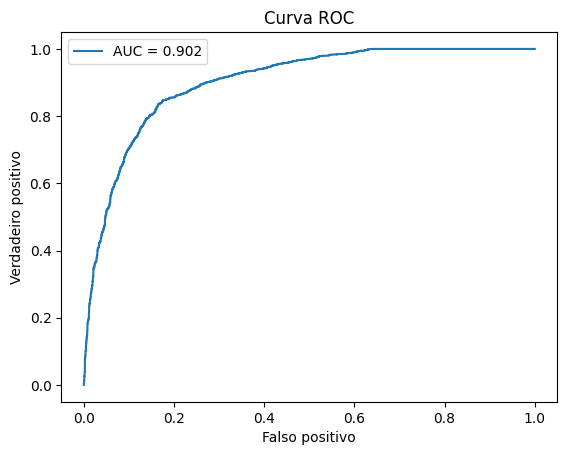

In [47]:

# coloquei verbose 0 para não printar os treinamentos
rn_model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test),verbose=0)

# Fazendo previsões em numeros flutuantes
probs = rn_model.predict(x_test).flatten() # desse modo que usarei na base_pagamentos_teste

# convertendo em binário 
y_pred = (probs >= 0.5).astype(int)

# Avaliando o modelo
print(classification_report(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



auc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc)

fpr, tpr, _ = roc_curve(y_test, probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.xlabel("Falso positivo")
plt.ylabel("Verdadeiro positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()
# Com os dados desbalanceados foram 0.48 de acerto no nosso target
# Matriz de Confusão:
# [[28790    37]
#  [ 2102    37]]

## Replicando os passos para `base_pagamentos_teste`

#### Resumo

##### Leitura

In [ ]:
base_pagamentos_teste = pd.read_csv('data/base_pagamentos_teste.csv', sep=';')
print(base_pagamentos_teste.info())
print(base_pagamentos_teste.isnull().sum())
display(base_pagamentos_teste.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              12275 non-null  int64  
 1   SAFRA_REF               12275 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  object 
 3   DATA_VENCIMENTO         12275 non-null  object 
 4   VALOR_A_PAGAR           12144 non-null  float64
 5   TAXA                    12275 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 575.5+ KB
None
ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99


##### Tratando as colunas para o formata correto de data para gerar cálculos como o indicador de `PRAZO`

In [49]:
base_pagamentos_teste['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(
    base_pagamentos_teste['DATA_EMISSAO_DOCUMENTO'], errors='coerce')

base_pagamentos_teste['DATA_VENCIMENTO'] = pd.to_datetime(
    base_pagamentos_teste['DATA_VENCIMENTO'], errors='coerce')

base_pagamentos_teste['PRAZO'] = (base_pagamentos_teste['DATA_VENCIMENTO'] - base_pagamentos_teste['DATA_EMISSAO_DOCUMENTO']).dt.days
#aplicando a correção dos prazos negativos 
base_pagamentos_teste.loc[base_pagamentos_teste['PRAZO']<0, 'PRAZO'] = base_pagamentos_teste.loc[base_pagamentos_teste['PRAZO']>0, 'PRAZO'].mode()[0]
display(base_pagamentos_teste.head(5))

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,PRAZO
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99,21
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99,46
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99,45
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99,45
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99,25


##### Merge com o dataframe `base_cadastral` para enriquecer a `base_pagamentos`

In [50]:
merged_base_pagamentos_teste = base_pagamentos_teste.merge(base_cadastral[['ID_CLIENTE','SEGMENTO_INDUSTRIAL','DOMINIO_EMAIL','PORTE','FLAG_PF']],
                                                           how='left', on='ID_CLIENTE')
print(merged_base_pagamentos_teste.shape)
print(merged_base_pagamentos_teste.isnull().sum())
merged_base_pagamentos_teste.head(2)

(12275, 11)
ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
PRAZO                       0
SEGMENTO_INDUSTRIAL        38
DOMINIO_EMAIL              38
PORTE                      38
FLAG_PF                    38
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,PRAZO,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,FLAG_PF
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99,21,Serviços,GMAIL,MEDIO,0.0
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99,46,Serviços,GMAIL,PEQUENO,0.0


##### Merge com o dataframe `base_info` para enriquecer a `base_pagamentos`

In [51]:
merged_base_pagamentos_teste_full = merged_base_pagamentos_teste.merge(
    base_info[['ID_CLIENTE','SAFRA_REF','NO_FUNCIONARIOS','RENDA_MES_ANTERIOR']],
    how='left',
    on=['ID_CLIENTE','SAFRA_REF']
)

colunas = ['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS']

# preenchendo nulos com a média do grupo PORTE
for coluna in colunas:
    medias = merged_base_pagamentos_teste_full.groupby('PORTE')[coluna].transform('mean')
    merged_base_pagamentos_teste_full[coluna] = merged_base_pagamentos_teste_full[coluna].fillna(medias)


print(merged_base_pagamentos_teste_full.shape)
print(merged_base_pagamentos_teste_full.isnull().sum())
merged_base_pagamentos_teste_full.head(2)

(12275, 13)
ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
PRAZO                       0
SEGMENTO_INDUSTRIAL        38
DOMINIO_EMAIL              38
PORTE                      38
FLAG_PF                    38
NO_FUNCIONARIOS             7
RENDA_MES_ANTERIOR          7
dtype: int64


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,PRAZO,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,FLAG_PF,NO_FUNCIONARIOS,RENDA_MES_ANTERIOR
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99,21,Serviços,GMAIL,MEDIO,0.0,143.862069,467430.0
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99,46,Serviços,GMAIL,PEQUENO,0.0,104.000000,417192.0


In [52]:
moda_porte = merged_base_pagamentos_teste_full['PORTE'].mode()[0]
moda_email = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']==moda_porte, 'DOMINIO_EMAIL'].mode()[0]
moda_segmento = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']==moda_porte, 'SEGMENTO_INDUSTRIAL'].mode()[0]
moda_flag_pf = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']==moda_porte, 'FLAG_PF'].mode()[0]
media_funcionarios= merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']==moda_porte, 'NO_FUNCIONARIOS'].mean()
media_renda= merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']==moda_porte, 'RENDA_MES_ANTERIOR'].mean()

In [53]:
merged_base_pagamentos_teste_full['PORTE'] = merged_base_pagamentos_teste_full['PORTE'].fillna(moda_porte)
merged_base_pagamentos_teste_full['DOMINIO_EMAIL'] = merged_base_pagamentos_teste_full['DOMINIO_EMAIL'].fillna(moda_email)
merged_base_pagamentos_teste_full['SEGMENTO_INDUSTRIAL'] = merged_base_pagamentos_teste_full['SEGMENTO_INDUSTRIAL'].fillna(moda_segmento)
merged_base_pagamentos_teste_full['FLAG_PF'] = merged_base_pagamentos_teste_full['FLAG_PF'].fillna(moda_flag_pf)
merged_base_pagamentos_teste_full['NO_FUNCIONARIOS'] = merged_base_pagamentos_teste_full['NO_FUNCIONARIOS'].fillna(media_funcionarios)
merged_base_pagamentos_teste_full['RENDA_MES_ANTERIOR'] = merged_base_pagamentos_teste_full['RENDA_MES_ANTERIOR'].fillna(media_funcionarios)

print(merged_base_pagamentos_teste_full.isnull().sum())

ID_CLIENTE                  0
SAFRA_REF                   0
DATA_EMISSAO_DOCUMENTO      0
DATA_VENCIMENTO             0
VALOR_A_PAGAR             131
TAXA                        0
PRAZO                       0
SEGMENTO_INDUSTRIAL         0
DOMINIO_EMAIL               0
PORTE                       0
FLAG_PF                     0
NO_FUNCIONARIOS             0
RENDA_MES_ANTERIOR          0
dtype: int64


In [54]:
merged_base_pagamentos_teste_full['HISTORICO_ATRASO'] = merged_base_pagamentos_teste_full['ID_CLIENTE'].map(historico_atraso['ATRASADO'])
merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['HISTORICO_ATRASO'].isna(), 'HISTORICO_ATRASO'] = 0

##### Substituindo os valores nulos da coluna `VALOR_A_PAGAR` pela média de cada porte 

In [55]:
merged_base_pagamentos_teste_full.loc[(merged_base_pagamentos_teste_full['VALOR_A_PAGAR'].isna()) & (merged_base_pagamentos_teste_full['PORTE'] == 'GRANDE'), 'VALOR_A_PAGAR'] = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE'] == 'GRANDE', 'VALOR_A_PAGAR'].mean()
merged_base_pagamentos_teste_full.loc[(merged_base_pagamentos_teste_full['VALOR_A_PAGAR'].isna()) & (merged_base_pagamentos_teste_full['PORTE'] == 'MEDIO'), 'VALOR_A_PAGAR'] = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE'] == 'MEDIO', 'VALOR_A_PAGAR'].mean()
merged_base_pagamentos_teste_full.loc[(merged_base_pagamentos_teste_full['VALOR_A_PAGAR'].isna()) & (merged_base_pagamentos_teste_full['PORTE'] == 'PEQUENO'), 'VALOR_A_PAGAR'] = merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE'] == 'PEQUENO', 'VALOR_A_PAGAR'].mean()

print(merged_base_pagamentos_teste_full.shape)
print(merged_base_pagamentos_teste_full.isnull().sum())

(12275, 14)
ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
PRAZO                     0
SEGMENTO_INDUSTRIAL       0
DOMINIO_EMAIL             0
PORTE                     0
FLAG_PF                   0
NO_FUNCIONARIOS           0
RENDA_MES_ANTERIOR        0
HISTORICO_ATRASO          0
dtype: int64


##### Tranformandos as variaveis categoricas em numericas

Na coluna `PORTE` coloquei em sequencia, pois acredito que quanto maior o porte da empresa melhor.<br>
Nas colunas `SEGMENTO_INDUSTRIAL` e `DOMINIO_EMAIL` apliquei o one-hot encoded de simples com o próprio pandas.

In [56]:
merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']=='PEQUENO','PORTE'] = 0
merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']=='MEDIO','PORTE'] = 1
merged_base_pagamentos_teste_full.loc[merged_base_pagamentos_teste_full['PORTE']=='GRANDE','PORTE'] = 2
merged_base_pagamentos_teste_full[['Comércio','Indústria','Serviços']] = pd.get_dummies(merged_base_pagamentos_teste_full['SEGMENTO_INDUSTRIAL']).astype(int)
merged_base_pagamentos_teste_full[['AOL','BOL','GMAIL','HOTMAIL','OUTLOOK','YAHOO']] = pd.get_dummies(merged_base_pagamentos_teste_full['DOMINIO_EMAIL']).astype(int)

# Criando o indicador de probabilidade de inadimplência

##### Aplicando o Scaler

In [57]:
colunas = ['PORTE','Comércio','Indústria','Serviços','AOL','BOL','GMAIL','HOTMAIL','OUTLOOK','YAHOO','RENDA_MES_ANTERIOR','NO_FUNCIONARIOS','TAXA','VALOR_A_PAGAR','PRAZO','FLAG_PF','HISTORICO_ATRASO']
merged_base_pagamentos_teste_full[colunas].head(3)

,PORTE,Comércio,Indústria,Serviços,AOL,BOL,GMAIL,HOTMAIL,OUTLOOK,YAHOO,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,TAXA,VALOR_A_PAGAR,PRAZO,FLAG_PF,HISTORICO_ATRASO
0,1,0,0,1,0,0,1,0,0,0,467430.0,143.862069,4.99,11204.75,21,0.0,0.0
1,0,0,0,1,0,0,1,0,0,0,417192.0,104.000000,5.99,60718.50,46,0.0,1.0
2,0,0,0,1,0,0,1,0,0,0,417192.0,104.000000,5.99,60718.50,45,0.0,1.0


In [58]:
# reutilizando o scaler treinado com a base de desenvolvimento
proba_teste = scaler.transform(merged_base_pagamentos_teste_full[colunas].values)
proba_teste[0:3]

array([[-0.13610736, -0.64394145, -0.55828585,  1.06348622, -0.21059056,
        -0.15077931,  1.60872894, -0.62991111, -0.24062035, -0.6825267 ,
         0.96576976,  1.32648821, -1.02636029, -0.3623239 , -0.32230826,
        -0.08146043, -2.13231534],
       [-1.47521497, -0.64394145, -0.55828585,  1.06348622, -0.21059056,
        -0.15077931,  1.60872894, -0.62991111, -0.24062035, -0.6825267 ,
         0.72073573, -0.66901503, -0.4689589 ,  0.24566672,  0.81654637,
        -0.08146043,  0.46897379],
       [-1.47521497, -0.64394145, -0.55828585,  1.06348622, -0.21059056,
        -0.15077931,  1.60872894, -0.62991111, -0.24062035, -0.6825267 ,
         0.72073573, -0.66901503, -0.4689589 ,  0.24566672,  0.77099219,
        -0.08146043,  0.46897379]])

##### Decisão de modelo

Eu decidir usar o modelo de floresta aleatória, por ser um modelo whitebox

In [59]:
# aplicando a probabilidade de inadimplência
previsoes = modelo_rf.predict(proba_teste).flatten()
previsoes = np.round(previsoes, 3)
merged_base_pagamentos_teste_full["PROBABILIDADE_INADIMPLENCIA"] = previsoes

Confrotando um aspecto da explicabilidade do modelo<br>
As variaveis mais importantes para a tomada de decisão do comitê

In [60]:
# pegando a features mais importando
importancias = modelo_rf.feature_importances_

# ligando elas com os nomes das colunas
df_importancias = pd.DataFrame({
    'variavel': colunas, 
    'importancia': importancias
})
# ordenando
df_importancias = df_importancias.sort_values(by='importancia', ascending=False)

display(df_importancias)

,variavel,importancia
13,VALOR_A_PAGAR,0.243796
14,PRAZO,0.173366
16,HISTORICO_ATRASO,0.159376
10,RENDA_MES_ANTERIOR,0.129224
11,NO_FUNCIONARIOS,0.126426
12,TAXA,0.042488
0,PORTE,0.034928
6,GMAIL,0.014871
9,YAHOO,0.012791
3,Serviços,0.012590


In [61]:

colunas.append('PROBABILIDADE_INADIMPLENCIA')

import plotly.express as px
# Gerando uma matriz de correlação para visualizar as relações entre os indicadores.

corr = merged_base_pagamentos_teste_full[colunas].corr()

fig = px.imshow(
    corr.round(2),
    text_auto=True,  
    aspect='auto', 
    
    color_continuous_scale='RdBu_r', 
    width=1200, height=500
    )

fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),
                  title=dict(text='Correlação entre os indicadores com HISTORICO_ATRASO', y=0.95, x=0.5, xanchor='center', yanchor='top')
                  )
fig.show()

Tenho receio que a variavel `HISTORICO_ATRASO` possa estar enviesando o modelo.<br>
Ou pode ser o melhor idicador.<br>
O problema é que até o primeiro atraso, o cliente não tem esse indicador ativo.

##### Entrega

In [62]:
# conclusão
base_resposta = merged_base_pagamentos_teste_full[['ID_CLIENTE', 'SAFRA_REF','PROBABILIDADE_INADIMPLENCIA']].copy()
# Fé 
base_resposta.to_csv('submissao_case.csv', index=False, encoding='utf-8', sep=';')